In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.shape

(301, 9)

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.replace({'Transmission' :{'Manual' : 0, 'Automatic' : 1 }} , inplace = True)

In [26]:
df.replace({'Selling_type' :{'Dealer' : 0, 'Individual' : 1 }} , inplace = True)

In [27]:
df.replace({'Fuel_Type' :{'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2 }} , inplace = True)

In [28]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [32]:

X = df.drop({'Car_Name' , 'Selling_Price'}, axis =1)
Y = df['Selling_Price']

In [33]:
from sklearn.model_selection import train_test_split

In [35]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2 )
     

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
predict_lr=lr.predict(X_test)

In [49]:
from sklearn import metrics

In [51]:
lr.score(X_train,Y_train)


0.8796483009370216

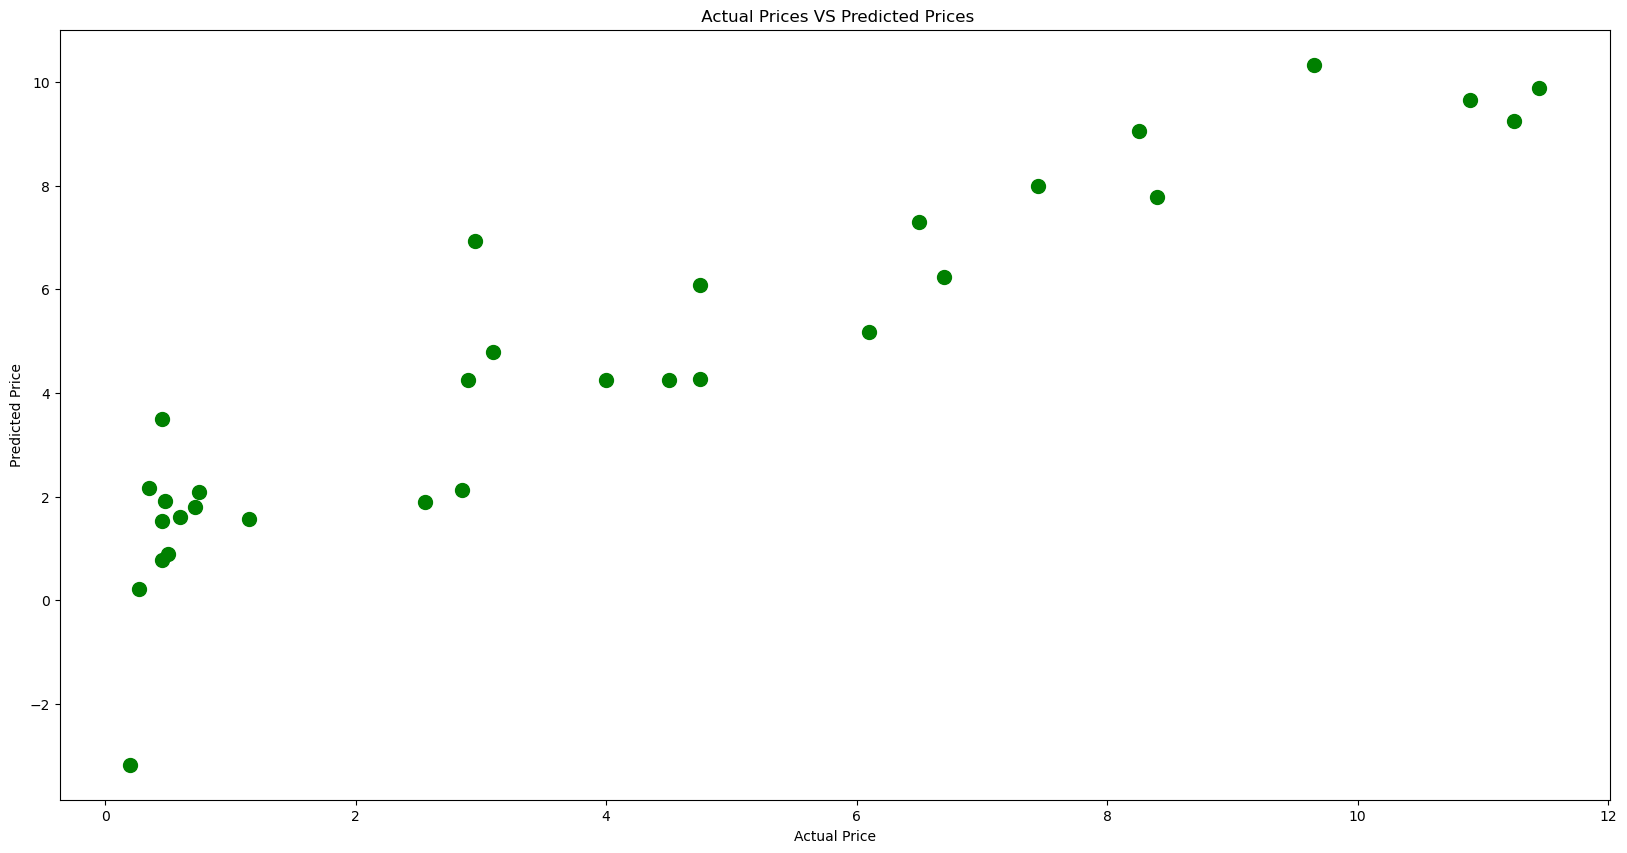

In [53]:



plt.figure(figsize=(20,10))
plt.scatter(Y_test, predict_lr , s =100, color = 'green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

In [54]:
from sklearn.linear_model import Lasso

In [55]:

lasso_model = Lasso()

In [56]:

lasso_model.fit(X_train, Y_train)

Lasso()

In [58]:
lasso_predict=lasso_model.predict(X_test)

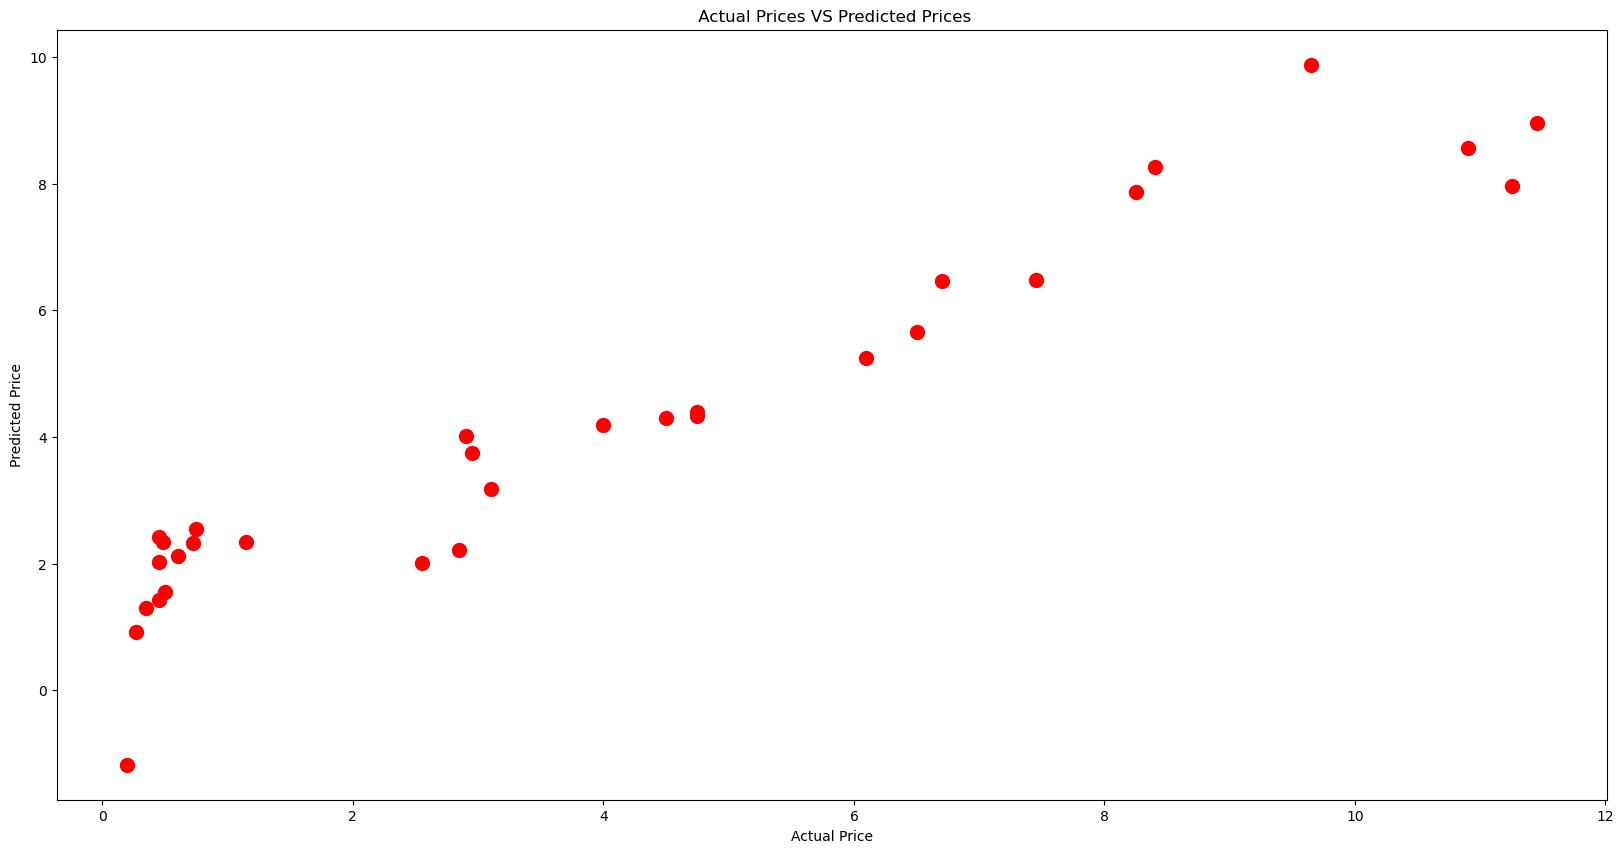

In [59]:



plt.figure(figsize=(20,10))
plt.scatter(Y_test, lasso_predict , s =100, color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

In [60]:
lasso_model.score(X_train, Y_train)

0.8424480718240743